In [25]:
# Import necessary libraries and data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.model_utils import get_models
from src.validation_utils import run_kfold, run_loocv
from src.feature_utils import log_transform, ordinal_encode, scale_features

df = pd.read_csv("Stars.csv")

In [23]:
# Plot Stylization

plt.style.use("dark_background")

COLORS = {
    "pink": "#ff4ecd",
    "blue": "#4ea8ff",
    "green": "#3dff9f",
    "purple": "#b36bff"
}

In [13]:
# Apply features

df_fe = log_transform(
    df,
    columns=["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)"]
)

df_fe = ordinal_encode(df_fe)
df_fe.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3.486855,-2.619789,-0.769551,16.12,0,11,6
1,3.483159,-3.301029,-0.811916,16.60,0,11,6
2,3.414973,-3.522877,-0.991400,18.70,0,11,6
3,3.447158,-3.698968,-0.795880,16.65,0,11,6
4,3.287578,-3.860118,-0.987163,20.06,0,11,6


In [15]:
# Seperate Features from the Target

X = df_fe.drop("Star type", axis=1)
y = df_fe["Star type"]

X_scaled, scaler = scale_features(X)

In [17]:
# Select a Model

models = get_models()
model = models["logistic_regression"]

In [19]:
# Compare validation strategies

kfold_mean, kfold_std = run_kfold(model, X_scaled, y, k=5)
loocv_mean, loocv_std = run_loocv(model, X_scaled, y)

print(f"K-Fold: {kfold_mean:.3f} ± {kfold_std:.3f}")
print(f"LOOCV:  {loocv_mean:.3f} ± {loocv_std:.3f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

K-Fold: 0.975 ± 0.016
LOOCV:  0.979 ± 0.143


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


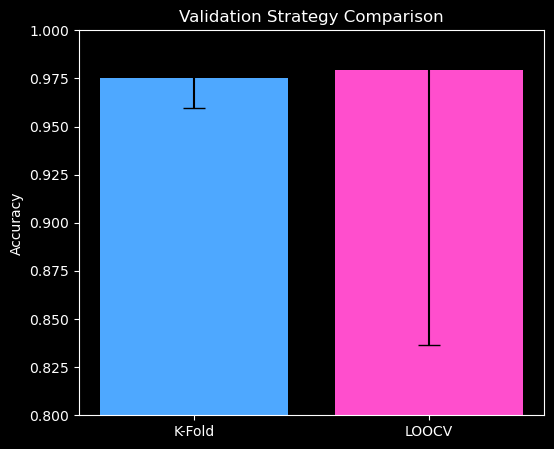

In [29]:
methods = ["K-Fold", "LOOCV"]
means = [kfold_mean, loocv_mean]
stds = [kfold_std, loocv_std]

plt.figure(figsize=(6, 5))
plt.bar(
    methods,
    means,
    yerr=stds,
    capsize=8,
    color=[COLORS["blue"], COLORS["pink"]]
)

plt.ylabel("Accuracy")
plt.title("Validation Strategy Comparison")
plt.ylim(0.8, 1.0)
plt.show()